# Final Project : Coke vs Pepsi

# Harshal Gogri and Xin Qiu

In [1]:
import pandas as pd
import numpy as np
import nltk,re,pprint
import matplotlib.pyplot as plt
import random
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
import re
import string

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#Downloading the nltk packages for text analysis
nltk.downloader.download('vader_lexicon')
nltk.downloader.download("wordnet")
wordnet_lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/qiuxin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/qiuxin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Reading the NLP_1 data set from the 2 data sets. This one has approximately 97000 rows.
comp_data = pd.read_excel('Coke vs Pepsi Twitter Data for NLP 1.xlsx')

In [4]:
#Referred the code from link : https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/
# The below code does tokenization of the data received from the data set.
# The code takes care of various emoji patterns, hashtags, website mentions, etc for tokenizing the text and getting plain words
# It also gets rid of the rare words whicha re of no use.
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [5]:
################## Separating coke and Pepsi data ##########################
count_pepsi = 0
count_coke = 0
pepsi_sent = []
coke_sent = []
hash_tags=[]
sentences = []
pepsi_word = []
coke_word = []
temp = []

#Removing stop words and punctuations to get rid of frequently occoring non -usefule words
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

#Getting the tweet data from the data set 
tweet = set(comp_data['Sound Bite Text'])

for doc in tweet:
    #Sentence tokenize
    sent = nltk.sent_tokenize(doc)    
    sentences.append(sent)  
for s in sentences:
    [temp.append(x) for x in s]
for t in temp: 
    terms_only = [term for term in preprocess(t) if term not in stop and
                  not term.startswith(('#', '@'))] 
    if len(terms_only) != 0:
        for p in terms_only:
            if p.lower() == 'pepsi':
                [pepsi_word.append(x) for x in terms_only]
                pepsi_sent.append(t)
                count_pepsi = count_pepsi+1
                break
            if p.lower() == 'coke' or p.lower() == 'coca-cola':
                [coke_word.append(x) for x in terms_only]
                coke_sent.append(t)
                count_coke = count_coke +1
                break
            
# Below we are printing the number of sentences that include brands: Coke or Pepsi
print("Sentences that include brand name Pepsi: ",count_pepsi)
print("Sentences that include brand name Coca-cola: " ,count_coke)


Sentences that include brand name Pepsi:  21158
Sentences that include brand name Coca-cola:  45459


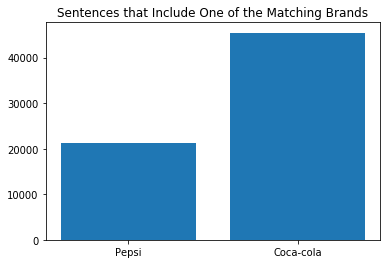

In [16]:
# draw a histogram of sentence count
sentencecount = {'Name':['Pepsi','Coca-cola'],'Sentence Count':[count_pepsi,count_coke]}
xyz = pd.DataFrame(sentencecount)
plt.title("Sentences that Include One of the Matching Brands")
plt.bar(range(len(xyz)),xyz['Sentence Count'], align='center')
plt.xticks(range(len(xyz)),xyz['Name'])
plt.show()

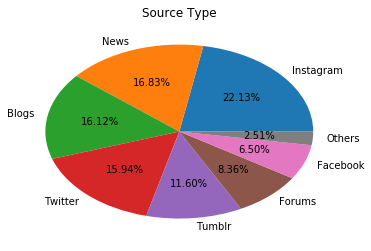

In [20]:
# draw a pie chart of source type
# set(comp_data['Source Type'])
sourcecount = {'Source':['Blogs','Comments','Consumer Reviews','Facebook','Forums','Instagram','News',
 'Other Social Networks','Professional Reviews','Tumblr','Twitter','YouTube']}
source = pd.DataFrame(sourcecount)
source['Count'] = None
for i in range (0, len(source)):
    sourcename = source.iloc[i,0]    
    sourcecount = 0
    for j in range(0,len(comp_data)):
        if comp_data.iloc[j,3] == sourcename:
            sourcecount += 1
    source.iloc[i,1] = sourcecount
sourcesort = source.sort_values(by = ['Count'], ascending = False)
# sourcesort
topic = sourcesort.copy()
topic = topic.reset_index()
topic.iloc[7,2] = topic.iloc[7,2] + topic.iloc[8,2] + topic.iloc[9,2] + topic.iloc[10,2] + topic.iloc[11,2]
topic.iloc[7,1] = 'Others'
topic = topic[:8]
plt.title("Source Type") 
plt.pie(topic['Count'],labels=topic['Source'],autopct='%1.2f%%') 
plt.show()

# Sentimental analysis - Pepsi

In [6]:
############ Sentiment analysis for Pepsi ##########################
pos_count = 0
neg_count = 0
neu_count = 0
pos_sent = []
neg_sent =[]
neu_sent = []
temp = []
sid = SentimentIntensityAnalyzer()
#for s in pepsi_sent:
 #   [temp.append(x) for x in s ]

# We have taken the cutoff threshold value to seperate the sentiments into positive, negative or neutral as 0.2 for the result obtained 
# under coumpound rate
for s in pepsi_sent:
    #print(s)
    ss = sid.polarity_scores(s)
    for k in sorted(ss):
         if k == 'compound':
            if ss[k] >= 0.2:
                pos_sent.append(s)
                pos_count=pos_count+1
            if ss[k] < 0.2 and ss[k] > -0.2:
                neu_sent.append(s)
                neu_count=neu_count+1
            if ss[k] <= -0.2:
                neg_sent.append(s)
                neg_count=neg_count+1
         #print('{0}:{1}, '.format(k, ss[k]), end='')
    #print()
#Printing the count of various sentiments for Pepsi
print("Positive sentences: ",pos_count)
print("Negative sentences: ",neg_count)
print("Neutral sentences: ",neu_count)

Positive sentences:  8005
Negative sentences:  3509
Neutral sentences:  9644


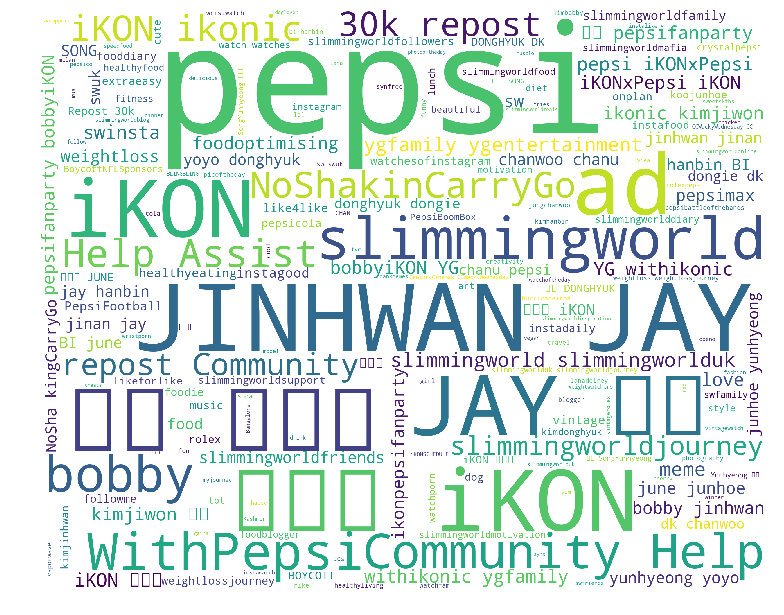

In [7]:
# For Pepsi, draw word cloud of hashtags associated with positive sentiments
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if word.startswith('#')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(pos_sent, color = 'white')

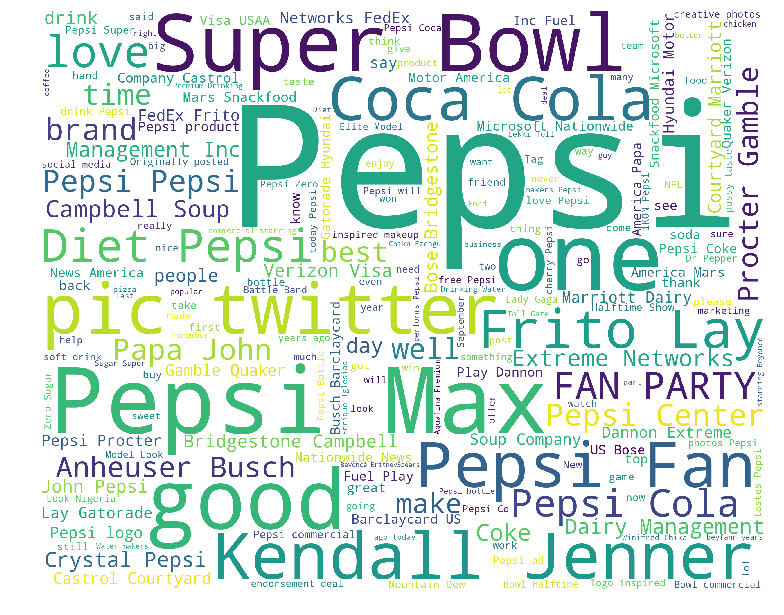

In [8]:
# For Pepsi, draw word cloud of words associated with positive sentiments
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(pos_sent, color = 'white')

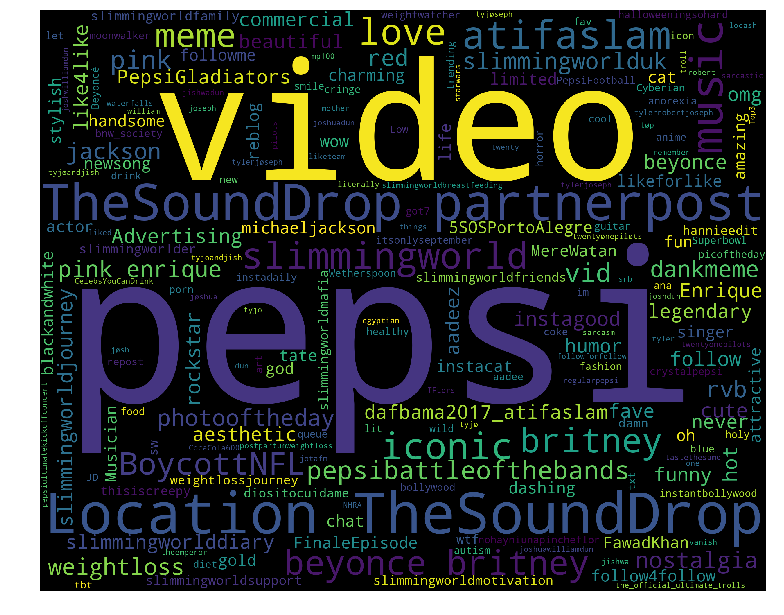

In [9]:
# For Pepsi, draw word cloud of hashtags associated with negative sentiments
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if word.startswith('#')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(neg_sent)

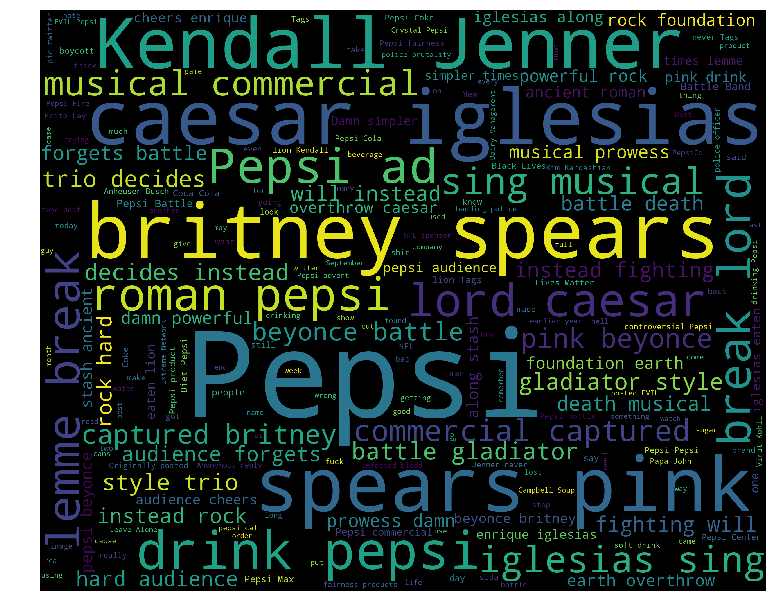

In [10]:
# For Pepsi, draw word cloud of words associated with negative sentiments
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(neg_sent)

In [10]:
########### For Pepsi ############
################## Positive hash tags #########################
#The below code prints all the hastags associated with the brand.
# These hashtags are associated with the positive sentiments of Pepsi

temp = []
hash_tags=[]

for t in pos_sent:    
    #terms_stop = [term for term in preprocess(s[0]) if term.lower() not in stop]
    terms_hash = [term for term in preprocess(t) if term.startswith('#')]  
    #print(terms_hash)
    #terms_only = [term for term in preprocess(s[0]) if term not in stop and
                  #not term.startswith(('#', '@'))] 
    if len(terms_hash) != 0:
        [hash_tags.append(x.lower()) for x in terms_hash]
#print(hash_tags)
counts={}
for i in hash_tags:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts_pos = sorted(counts.items(), key=lambda x: x[1], reverse=True)

#print('Top 30 hashtags associated with positive sentiments\n')
#print(sort_counts_pos[:50])
#[print(s[0]) for s in sort_counts_pos[:50]]

print()

############################### negative hash tags ###########################3

temp = []
hash_tags=[]

for t in neg_sent:    
    #terms_stop = [term for term in preprocess(s[0]) if term.lower() not in stop]
    terms_hash = [term for term in preprocess(t) if term.startswith('#')]  
    #print(terms_hash)
    #terms_only = [term for term in preprocess(s[0]) if term not in stop and
                  #not term.startswith(('#', '@'))] 
    if len(terms_hash) != 0:
        [hash_tags.append(x.lower()) for x in terms_hash]
#print(hash_tags)
counts={}
for i in hash_tags:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts_neg = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 hashtags associated with Negative sentiments\n')
#[print(s[0]) for s in sort_counts_neg[:50]]
#print(sort_counts_neg[:50])

############################# neutral hashtags ############################333

temp = []
hash_tags=[]

for t in neu_sent:    
    #terms_stop = [term for term in preprocess(s[0]) if term.lower() not in stop]
    terms_hash = [term for term in preprocess(t) if term.startswith('#')]  
    #print(terms_hash)
    #terms_only = [term for term in preprocess(s[0]) if term not in stop and
                  #not term.startswith(('#', '@'))] 
    if len(terms_hash) != 0:
        [hash_tags.append(x.lower()) for x in terms_hash]
#print(hash_tags)
counts={}
for i in hash_tags:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts_neu = sorted(counts.items(), key=lambda x: x[1], reverse=True)


In [18]:
tknzr = TweetTokenizer()
def preprocess_complaint_narratives(df):
    sentences = []
    for s in df:
        #Sentence tokenize
        #word tokenize
        sent = wordnet_lemmatizer.lemmatize(s)
        sent = [tknzr.tokenize(sent)]
        #Part of speech tagging
        sent = [nltk.pos_tag(s) for s in sent if s not in stop]
        for s in sent:
            sentences.append(s)
    return sentences

In [19]:
################## Attributes for positive sentiment analysis of Pepsi ####################
############# Top 100 Nouns ################################

#The below code prints the top 100 nouns, verbs and adjectives with the help of POS tags attached using POS tagger to the words
# These words are associated with the positive sentiments of Pepsi. These are the attributes that contribute for better performance of Pepsi as a brand

tokens = preprocess_complaint_narratives(pos_sent)
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'N']
to_delete = set(string.punctuation) 
to_delete.update({ "'" , '"',"_" ,' ' , '-'})  # remove comma and fullstop
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_nn = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 nouns associated with Positive sentiments\n')
#[print(s[0]) for s in top_nn[:50]]
# [print(s[1]) for s in top_nn[:50]]

################################ Top 100 verbs ###################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'V']
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_verb = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 verbs associated with Positive sentiments\n')
#[print(s[0]) for s in top_verb[:50]]
# [print(s[1]) for s in top_verb[:50]]

##################### Top 100 Adjectives #########################################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'J']
clean_tokens = [x for x in a if x not in to_delete]


counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_adj = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 adjectives associated with Positive sentiments\n')
#[print(s[0]) for s in top_adj[:50]]
# [print(s[1]) for s in top_adj[:50]]

In [20]:
################## Attributes for negative sentiment analysis of Pepsi ####################
############# Top 100 Nouns ################################

#The below code prints the top 100 nouns, verbs and adjectives with the help of POS tags attached using POS tagger to the words
# These words are associated with the negative sentiments of Pepsi. These are the attributes that contribute for better performance of Pepsi as a brand


tokens = preprocess_complaint_narratives(neg_sent)
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'N']
to_delete = set(string.punctuation) 
to_delete.update({ "'" , '"',"_" ,' ' , '-'})  # remove comma and fullstop
clean_tokens = [x for x in a if x not in to_delete]


counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_nn = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 nouns associated with Positive sentiments\n')
#[print(s[0]) for s in top_nn[:50]]
# [print(s[1]) for s in top_nn[:50]]
################################ Top 100 verbs ###################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'V']
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_verb = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 verbs associated with Positive sentiments\n')
#[print(s[0]) for s in top_verb[:50]]
# [print(s[1]) for s in top_verb[:50]]
##################### Top 100 Adjectives #########################################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'J']
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_adj = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 adjectives associated with Positive sentiments\n')
#[print(s[0]) for s in top_adj[:50]]
# [print(s[1]) for s in top_verb[:50]]

# Sentimental analysis Coca-cola

In [11]:
######################## Sentiment analysis for Coke #######################################

pos_count = 0
neg_count = 0
neu_count = 0
pos_sent = []
neg_sent =[]
neu_sent = []
temp = []
sid = SentimentIntensityAnalyzer()
#for s in pepsi_sent:
 #   [temp.append(x) for x in s ]

# We have taken the cutoff threshold value to seperate the sentiments into positive, negative or neutral as 0.2 for the result obtained 
# under coumpound rate
for s in coke_sent:
    #print(s)
    ss = sid.polarity_scores(s)
    for k in sorted(ss):
         if k == 'compound':
            if ss[k] >= 0.2:
                pos_sent.append(s)
                pos_count=pos_count+1
            if ss[k] < 0.2 and ss[k] > -0.2:
                neu_sent.append(s)
                neu_count=neu_count+1
            if ss[k] <= -0.2:
                neg_sent.append(s)
                neg_count=neg_count+1
         #print('{0}:{1}, '.format(k, ss[k]), end='')
    #print()
#The code prints count of various sentiments in tweets for Coca-cola as brand
print('Positive sentences ',pos_count)
print('Negative sentences ',neg_count)
print('Neutral sentences ',neu_count)

Positive sentences  19846
Negative sentences  5199
Neutral sentences  20414


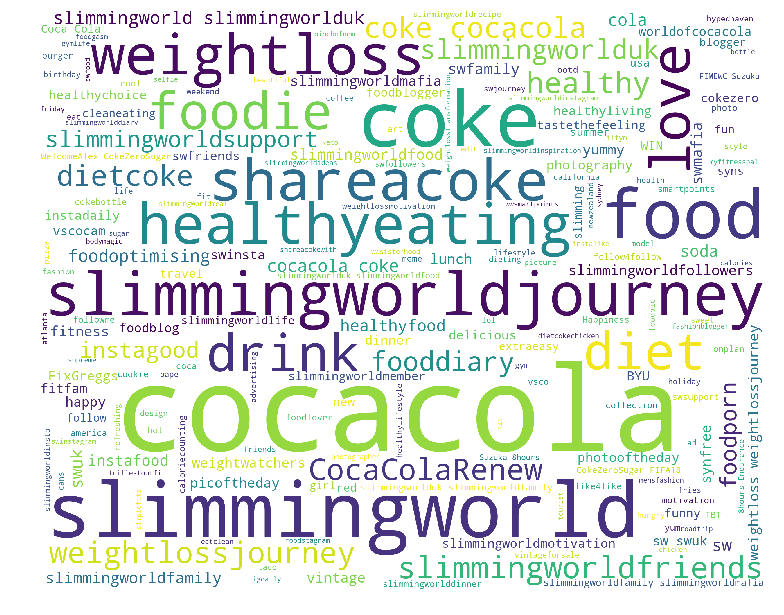

In [12]:
# For Coca-Cola, draw word cloud of hashtags associated with positive sentiments
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if word.startswith('#')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(pos_sent, color = 'white')

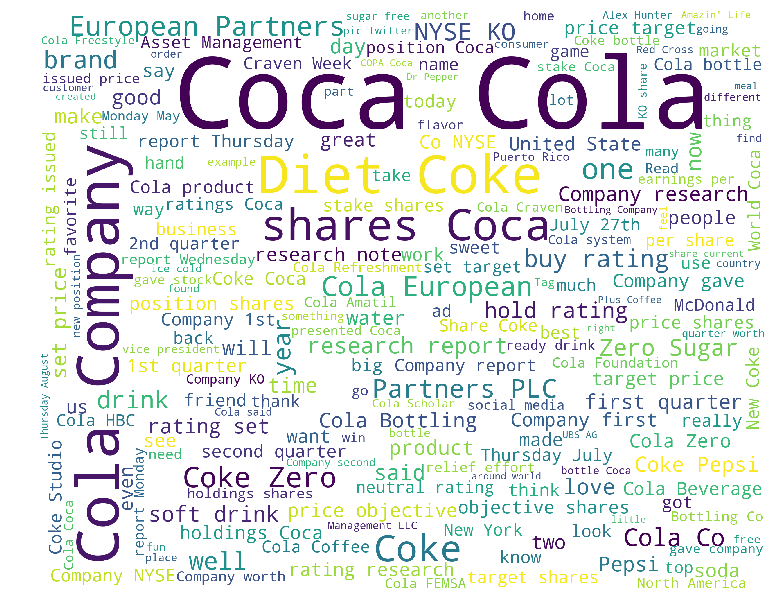

In [13]:
# For Coca-Cola, draw word cloud of words associated with positive sentiments
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(pos_sent, color = 'white')

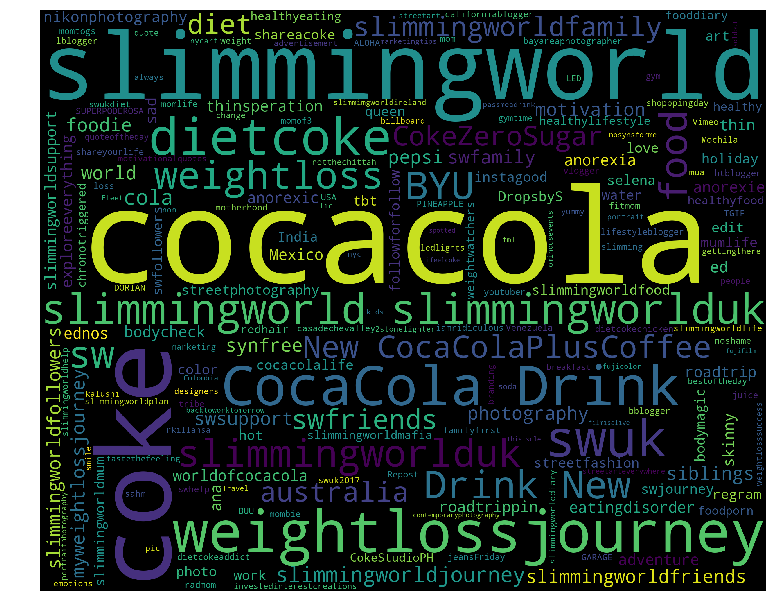

In [14]:
# For Coca-Cola, draw word cloud of hashtags associated with negative sentiments
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if word.startswith('#')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(neg_sent)

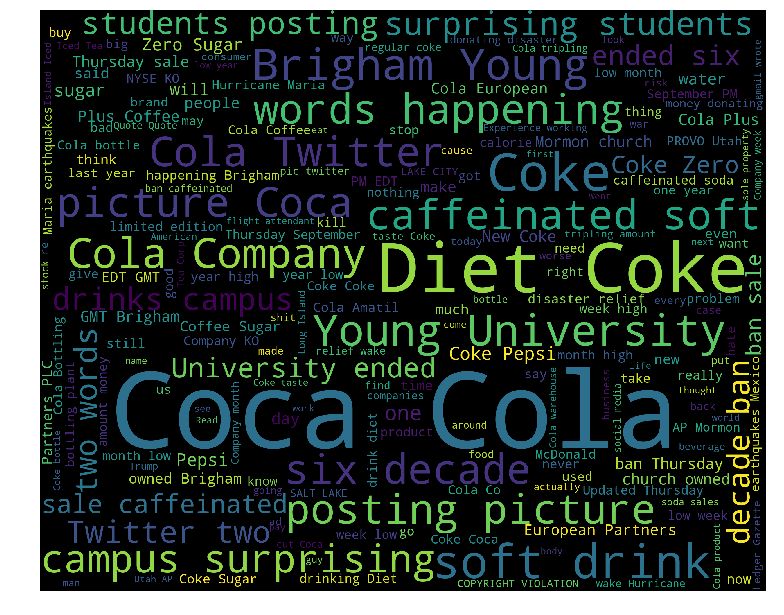

In [15]:
# For Coca-Cola, draw word cloud of words associated with negative sentiments
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud_draw(neg_sent)

In [23]:
########### For Coca-cola ############
################## Positive hash tags #########################
#The below code prints all the hastags associated with the brand.
# These hashtags are associated with the positive sentiments of Coca-cola
temp = []
hash_tags=[]

for t in pos_sent:    
    #terms_stop = [term for term in preprocess(s[0]) if term.lower() not in stop]
    terms_hash = [term for term in preprocess(t) if term.startswith('#')]  
    #print(terms_hash)
    #terms_only = [term for term in preprocess(s[0]) if term not in stop and
                  #not term.startswith(('#', '@'))] 
    if len(terms_hash) != 0:
        [hash_tags.append(x.lower()) for x in terms_hash]
#print(hash_tags)
counts={}
for i in hash_tags:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts_pos = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 hashtags associated with positive sentiments\n')
#print(sort_counts_pos[:50])
#[print(s[0]) for s in sort_counts_pos[:50]]

############################### negative hash tags ###########################3

temp = []
hash_tags=[]

for t in neg_sent:    
    #terms_stop = [term for term in preprocess(s[0]) if term.lower() not in stop]
    terms_hash = [term for term in preprocess(t) if term.startswith('#')]  
    #print(terms_hash)
    #terms_only = [term for term in preprocess(s[0]) if term not in stop and
                  #not term.startswith(('#', '@'))] 
    if len(terms_hash) != 0:
        [hash_tags.append(x.lower()) for x in terms_hash]
#print(hash_tags)
counts={}
for i in hash_tags:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts_neg = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 hashtags associated with negative sentiments\n')
#print(sort_counts_pos[:50])
#[print(s[0]) for s in sort_counts_neg[:50]]

############################# neutral hashtags ############################333

temp = []
hash_tags=[]

for t in neu_sent:    
    #terms_stop = [term for term in preprocess(s[0]) if term.lower() not in stop]
    terms_hash = [term for term in preprocess(t) if term.startswith('#')]  
    #print(terms_hash)
    #terms_only = [term for term in preprocess(s[0]) if term not in stop and
                  #not term.startswith(('#', '@'))] 
    if len(terms_hash) != 0:
        [hash_tags.append(x.lower()) for x in terms_hash]
#print(hash_tags)
counts={}
for i in hash_tags:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts_neu = sorted(counts.items(), key=lambda x: x[1], reverse=True)


In [24]:
################## Attributes for positive sentiment analysis of Coca-cola ####################
############# Top 100 Nouns ################################

#The below code prints the top 100 nouns, verbs and adjectives with the help of POS tags attached using POS tagger to the words
# These words are associated with the positive sentiments of Coca-cola. These are the attributes that contribute for better performance of Pepsi as a brand


tokens = preprocess_complaint_narratives(pos_sent)
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'N']
to_delete = set(string.punctuation) 
to_delete.update({ "'" , '"',"_" ,' ' , '-'})  # remove comma and fullstop
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_nn = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# print('Top 30 nouns associated with Positive sentiments\n')
# [print(s[0]) for s in top_nn[:50]]
# [print(s[1]) for s in top_nn[:50]]

################################ Top 100 verbs ###################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'V']
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_verb = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# print('Top 30 verbs associated with Positive sentiments\n')
# [print(s[0]) for s in top_verb[:50]]
# [print(s[1]) for s in top_nn[:50]]
##################### Top 100 Adjectives #########################################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'J']
clean_tokens = [x for x in a if x not in to_delete]


counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_adj = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 adjectives associated with Positive sentiments\n')
#[print(s[0]) for s in top_adj[:50]]
#[print(s[1]) for s in top_nn[:50]]

In [25]:
################## Attributes for negative sentiment analysis of Coca-cola ####################
############# Top 100 Nouns ################################

#The below code prints the top 100 nouns, verbs and adjectives with the help of POS tags attached using POS tagger to the words
# These words are associated with the negative sentiments of Coca-cola. These are the attributes that contribute for better performance of Pepsi as a brand


tokens = preprocess_complaint_narratives(neg_sent)
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'N']
to_delete = set(string.punctuation) 
to_delete.update({ "'" , '"',"_" ,' ' , '-'})  # remove comma and fullstop
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_nn = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# print('Top 30 nouns associated with Negative sentiments\n')
# [print(s[0]) for s in top_nn[:50]]
################################ Top 100 verbs ###################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'V']
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_verb = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# print('Top 30 verbs associated with Negative sentiments\n')
# [print(s[0]) for s in top_verb[:50]]
##################### Top 100 Adjectives #########################################33
abc = []
lem = []
for t in tokens:
    [abc.append(x) for x in t] 
#print(abc)
a = [item[0].lower() for item in abc if item[1][0] == 'J']
clean_tokens = [x for x in a if x not in to_delete]

counts={}
for i in clean_tokens:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
top_adj = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#print('Top 30 adjectives associated with Negative sentiments\n')
#[print(s[0]) for s in top_adj[:50]]